In [1]:
import os
import sys
from pathlib import Path
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from global_config import *
from src.utils.helpers import get_emotion_abrs_from_ids, mapper

In [4]:
input_path = os.path.join(ROOT_DIR,'files/tests/preprocessing/dataset_creation/video_data_functionals_A220.npz')
output_path = os.path.join(ROOT_DIR,'files/out/functionals/unsupervised_learning/video')

In [5]:
npz_file = np.load(input_path, allow_pickle=True)
_X = npz_file['x']
y = npz_file['y']
col_names = npz_file['col_names']

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(_X)

# PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

TODO: Use valence to color the datapoints

In [12]:
plt.figure(figsize=(15,15))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)

y_emotions = mapper(y, emotion_id_to_emotion)
# Add the labels
for idx, emotion in enumerate(y_emotions):

    # Add the text label
    labelpad = 0.01   # Adjust this based on your dataset
    plt.text(x_pca[idx, 0]+labelpad, x_pca[idx, 1]+labelpad, emotion, fontsize=9)

    # Mark the labeled observations with a star marker
    # plt.scatter(features_pca[i,0], features_pca[i,1],
    #            c=cvec[i], vmin=min(cvec), vmax=max(cvec),
    #            edgecolor='', marker='*', s=100)


# Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
plt.show()

NameError: name 'x_pca' is not defined

<Figure size 1080x1080 with 0 Axes>

# T-SNE

In [9]:
x_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3, verbose=3).fit_transform(X)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 352 samples in 0.000s...
[t-SNE] Computed neighbors for 352 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 352 / 352
[t-SNE] Mean sigma: 0.288927
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 82.1834183, gradient norm = 0.7368366 (50 iterations in 0.118s)
[t-SNE] Iteration 100: error = 77.6082611, gradient norm = 0.6826009 (50 iterations in 0.044s)
[t-SNE] Iteration 150: error = 77.2381210, gradient norm = 0.6903495 (50 iterations in 0.065s)
[t-SNE] Iteration 200: error = 79.7681732, gradient norm = 0.6313400 (50 iterations in 0.048s)
[t-SNE] Iteration 250: error = 77.4907684, gradient norm = 0.6242752 (50 iterations in 0.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.490768
[t-SNE] Iteration 300: error = 1.3665630, gradient norm = 0.0080559 (50 iterations in 0.041s)
[t-SNE] Iteration 350: error = 1.1494498, gradient norm = 0.0012172 (

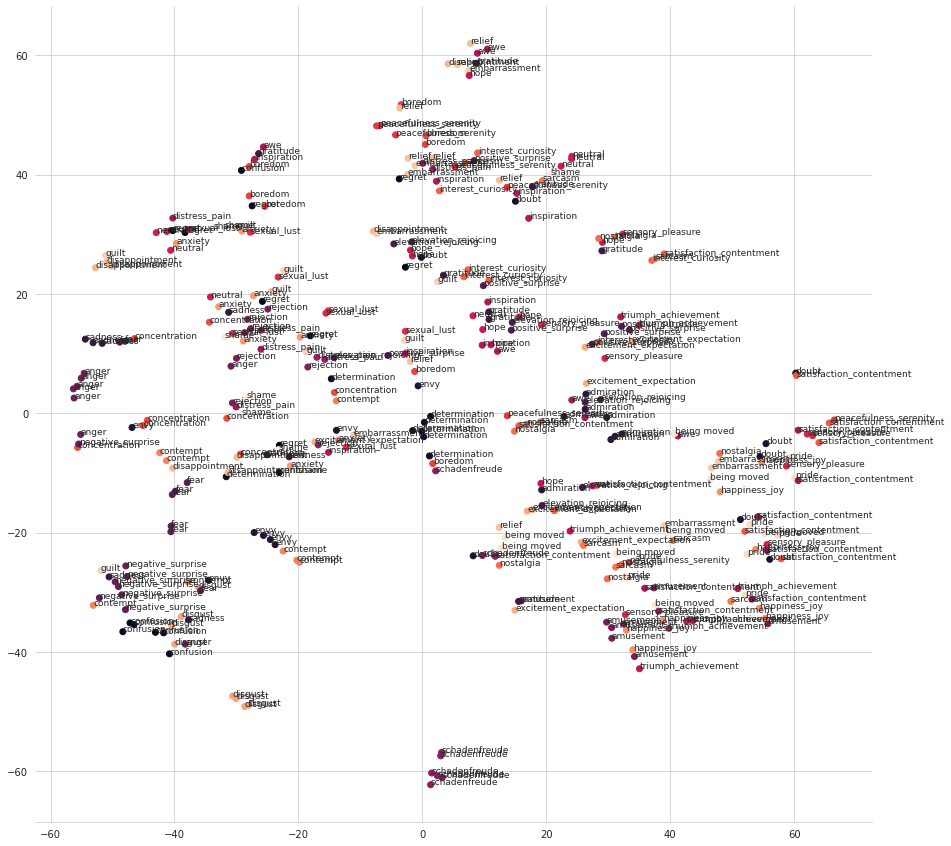

In [23]:
plt.figure(figsize=(15,15))
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)

y_emotions = mapper(y, emotion_id_to_emotion)
# Add the labels
for idx, emotion in enumerate(y_emotions):

    # Add the text label
    labelpad = 0.01   # Adjust this based on your dataset
    plt.text(x_embedded[idx, 0]+labelpad, x_embedded[idx, 1]+labelpad, emotion, fontsize=9)

    # Mark the labeled observations with a star marker
    # plt.scatter(features_pca[i,0], features_pca[i,1],
    #            c=cvec[i], vmin=min(cvec), vmax=max(cvec),
    #            edgecolor='', marker='*', s=100)


plt.show()